In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
df=pd.read_csv('Telecom_data.csv')

In [106]:
df.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [107]:
#We can easily see o use of state and phone in this so we remove them
df.drop(['State','Phone'],axis=1,inplace=True)

In [108]:
df.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(3)
memory usage: 494.8+ KB


In [110]:
s1=df["Int'l Plan"]
s1=s1.replace(['yes','no'],[1,0])
s2=df["VMail Plan"]
s2=s2.replace(['yes','no'],[1,0])
s3=df["Churn?"]
s3=s3.replace(['True.','False.'],[1,0])

In [111]:
#Data Exploration #removing object type data and target


df.drop(["Int'l Plan","VMail Plan","Churn?" ],axis=1,inplace=True)

In [112]:
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [113]:
#exploratory visualization #histogram
df.hist(figsize=(15,15))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ac241cb70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4ac256f5f8>]], dtype=object)

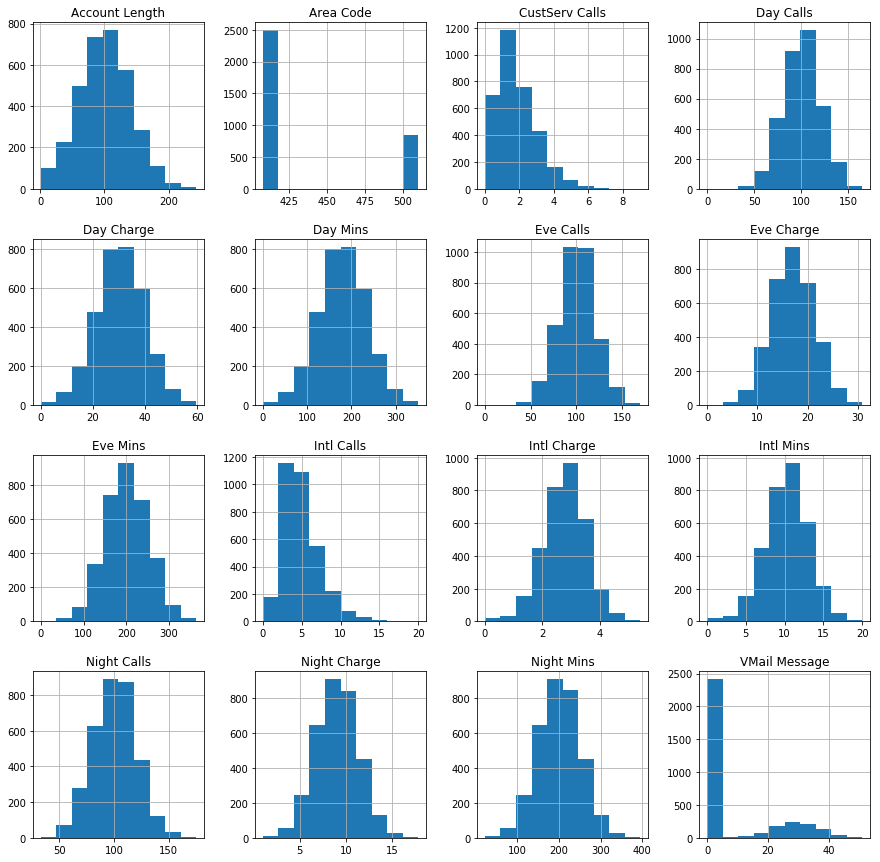

In [114]:
plt.show()

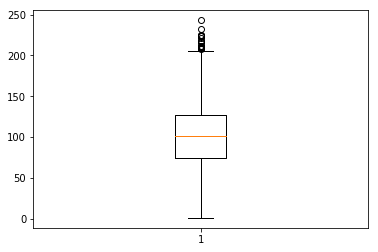

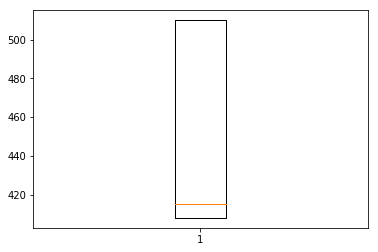

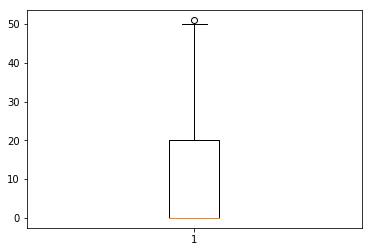

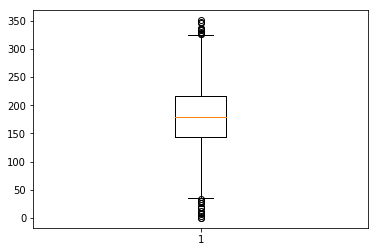

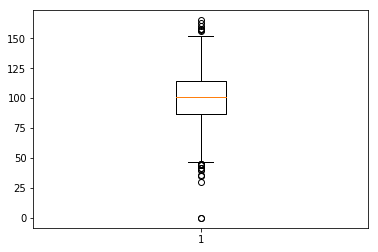

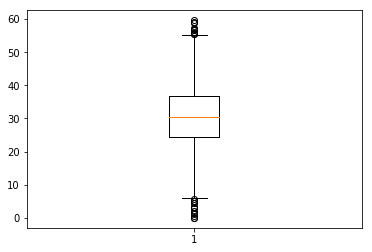

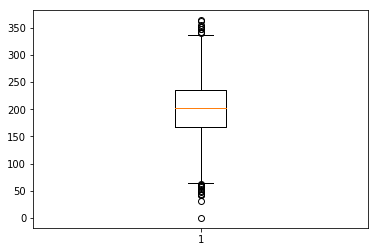

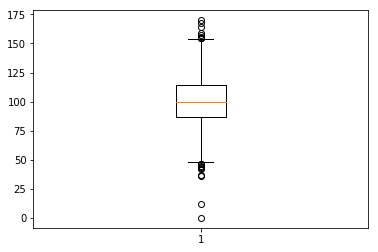

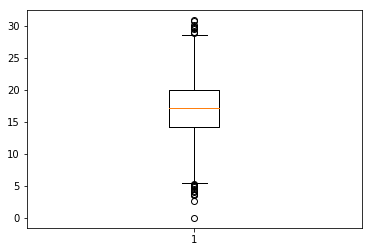

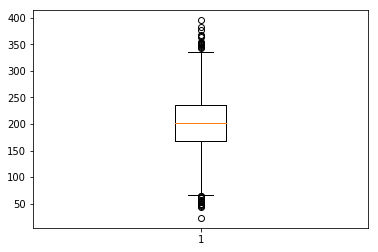

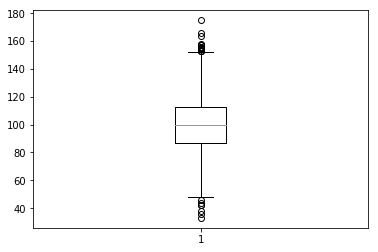

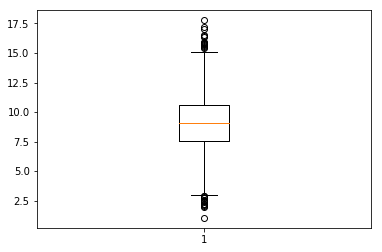

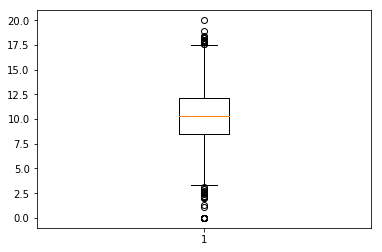

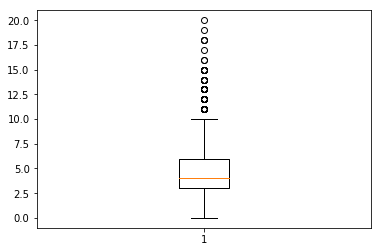

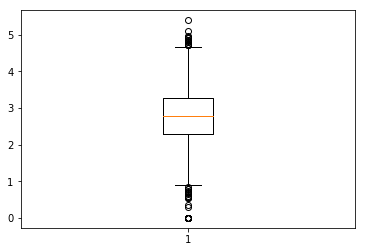

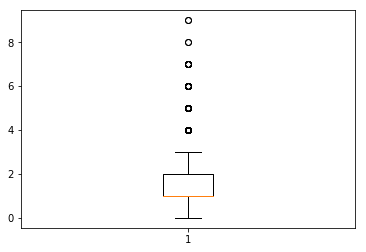

In [115]:
for i in df.columns:
    plt.boxplot(df['%s'% i])
    plt.show()
   

In [116]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

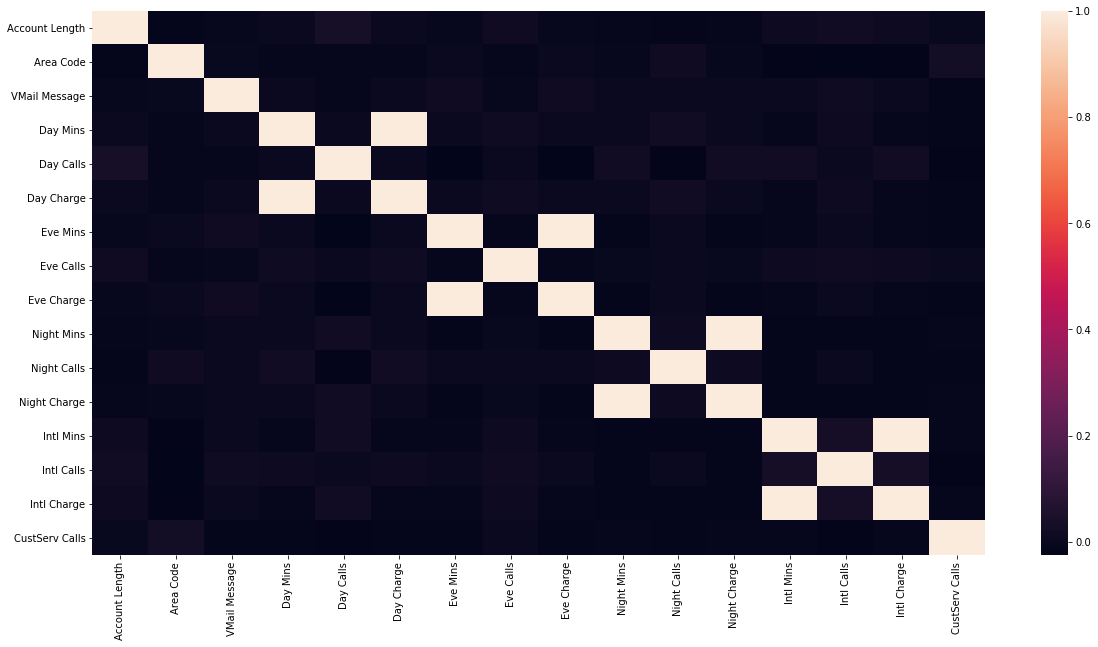

In [117]:
plt.show()#correlation between attributes

In [118]:
#no missing values #feature scaling
from sklearn.preprocessing import StandardScaler

In [119]:

df["Int'l Plan"] = s1
df["VMail Plan"] = s2

In [120]:
scaler=StandardScaler()
X=df.as_matrix().astype(np.float)
X=scaler.fit_transform(X)

In [121]:
X[1]

array([ 0.14906505, -0.52360328,  1.30794844, -0.33373776,  1.12450284,
       -0.33401297, -0.10808036,  0.14486653, -0.10754944,  1.05857074,
        0.14782467,  1.05938994,  1.24048169, -0.60119509,  1.2411686 ,
       -0.42793202, -0.32758048,  1.6170861 ])

In [122]:
c=pd.DataFrame(X)

In [123]:
c

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.676489,-0.523603,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,-0.327580,1.617086
1,0.149065,-0.523603,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,-0.327580,1.617086
2,0.902529,-0.523603,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,-0.327580,-0.618396
3,-0.428590,-0.688834,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,3.052685,-0.618396
4,-0.654629,-0.523603,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,3.052685,-0.618396
5,0.425335,1.718817,-0.591760,0.801056,-0.121381,0.801216,0.386928,0.044463,0.386648,0.059881,0.914473,0.061821,-1.410498,0.617898,-1.412550,-1.188218,3.052685,-0.618396
6,0.500681,1.718817,1.161817,0.705572,-0.619735,0.705083,2.909300,0.395875,2.908677,0.231933,0.914473,0.233209,-0.980610,1.024263,-0.974686,1.092641,-0.327580,1.617086
7,1.153683,-0.523603,-0.591760,-0.418205,-1.068253,-0.418264,-1.930341,-0.306949,-1.931206,0.216112,-0.209945,0.215631,-1.123906,0.617898,-1.120641,-1.188218,3.052685,-0.618396
8,0.400220,-0.688834,-0.591760,0.086760,-0.171217,0.087242,2.970436,-1.009773,2.971322,0.295216,-0.516604,0.294733,-0.550721,-0.194831,-0.550091,-0.427932,-0.327580,-0.618396
9,1.002990,-0.523603,2.111671,1.447412,-0.819076,1.447141,0.414538,0.546480,0.414490,2.482445,-0.158835,2.483233,0.344880,0.211534,0.338904,-1.188218,3.052685,1.617086


In [124]:
c.columns=df.columns

In [125]:
c.head(5)

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Int'l Plan,VMail Plan
0,0.676489,-0.523603,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,-0.327580,1.617086
1,0.149065,-0.523603,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,-0.327580,1.617086
2,0.902529,-0.523603,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,-0.327580,-0.618396
3,-0.428590,-0.688834,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,3.052685,-0.618396
4,-0.654629,-0.523603,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,3.052685,-0.618396


In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
model=RandomForestClassifier(n_estimators=1000)
model.fit(c,target)
importance=model.feature_importances_




In [128]:
importance=pd.DataFrame(importance)


In [129]:
importance.index=c.columns


In [130]:
importance

,0
Account Length,0.029438
Area Code,0.008084
VMail Message,0.030950
Day Mins,0.136856
Day Calls,0.030607
Day Charge,0.141424
Eve Mins,0.067220
Eve Calls,0.027446
Eve Charge,0.066522
Night Mins,0.038044


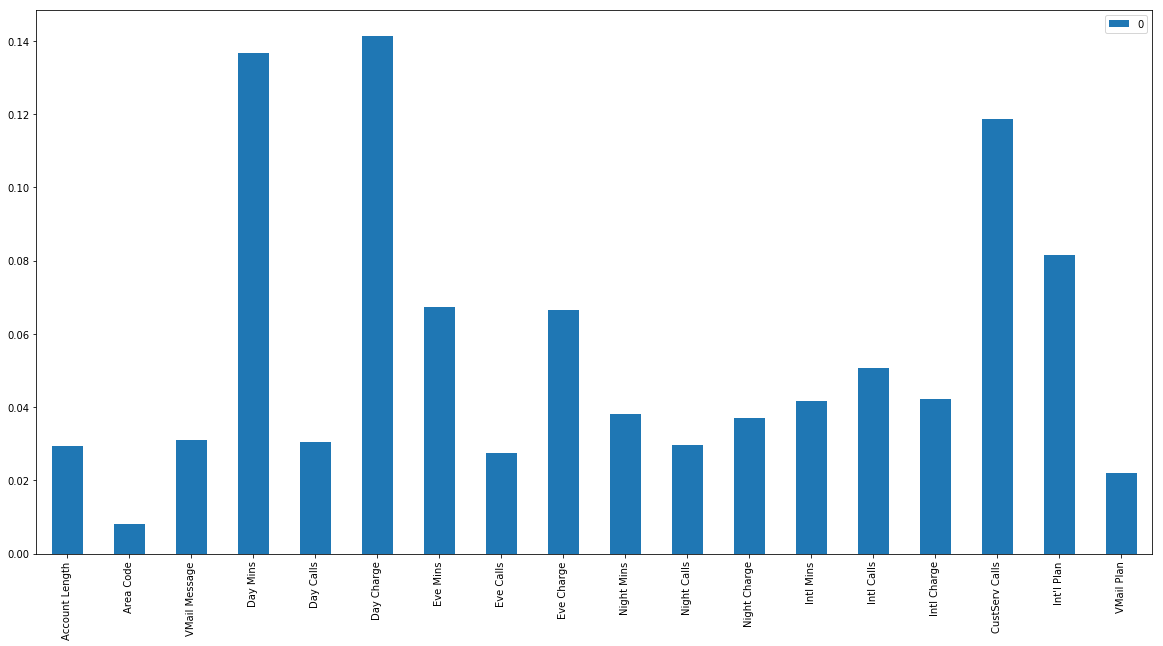

In [134]:
importance.plot(kind='bar',stacked=True,figsize=(20,10))
plt.show()

In [137]:
from sklearn.cross_validation import KFold, cross_val_score
k_fold = KFold(len(target), n_folds=10, shuffle=True, random_state=0)
clf = RandomForestClassifier()
print (cross_val_score(clf, c, target, cv=k_fold, n_jobs=1))

[ 0.95508982  0.94610778  0.95508982  0.93693694  0.93393393  0.94294294
  0.96396396  0.94894895  0.94294294  0.91291291]


In [145]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(c,target, test_size=0.33)
modell=RandomForestClassifier(n_estimators=1000)
modell.fit(X_train,y_train)
modell.score(X_test,y_test)

0.95272727272727276

In [146]:
y_predict=modell.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict))

[[923   5]
 [ 47 125]]


In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       928
          1       0.96      0.73      0.83       172

avg / total       0.95      0.95      0.95      1100



We can see that it has average F1 Score of 0.95

In [148]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_predict)

0.86067812750601447

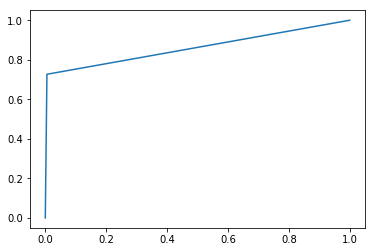

In [149]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
plt.plot(fpr,tpr)
plt.show()

In [152]:
from sklearn.naive_bayes import GaussianNB
model3=GaussianNB()
model3.fit(X_train,y_train)
print(model3.score(X_test,y_test))

0.851818181818


COMBINING BOTH OF MODELS WITH EACH HAVING EQUAL WEIGHTAGE

In [156]:
s11=model3.predict_proba(X_test)

In [157]:
s12=modell.predict_proba(X_test)

In [158]:
s11

array([[ 0.90777475,  0.09222525],
       [ 0.92549436,  0.07450564],
       [ 0.18978665,  0.81021335],
       ..., 
       [ 0.9967481 ,  0.0032519 ],
       [ 0.97801159,  0.02198841],
       [ 0.69133869,  0.30866131]])

In [159]:
s12

array([[ 0.988,  0.012],
       [ 0.942,  0.058],
       [ 0.142,  0.858],
       ..., 
       [ 0.989,  0.011],
       [ 0.992,  0.008],
       [ 0.649,  0.351]])

In [168]:
s13=0.5*s11 + 0.5*s12

In [164]:
modell.predict(X_test.iloc[1].reshape(1,-1))

/home/spartan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([0])

In [169]:
s13

array([[ 0.94788737,  0.05211263],
       [ 0.93374718,  0.06625282],
       [ 0.16589332,  0.83410668],
       ..., 
       [ 0.99287405,  0.00712595],
       [ 0.98500579,  0.01499421],
       [ 0.67016934,  0.32983066]])

In [174]:
s13[1]

array([ 0.93374718,  0.06625282])

In [171]:
len(s13)

1100

In [190]:
y_predicted=[]

In [191]:
for i in range(1100):
    y_predicted.append(int(s13[i][0]<s13[i][1]))
    

In [193]:

y_predicted

[0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [194]:
confusion_matrix(y_test,y_predicted)

array([[878,  50],
       [ 72, 100]])

score= (878+100)/(878+50+72+100) = 89%

So,
Score(random forest) = 95%
Score(gaussianNB) = 85%
Score(combined) = 89%